# RMSProp

In [ ]:
"""
# RMSProp Optimizer

RMSProp, or Root Mean Square Propagation, is an adaptive learning rate optimization algorithm commonly used in training deep learning models.
 It addresses some limitations of traditional gradient descent methods by adjusting the learning rate for each parameter based on the average of recent gradients.

 ### How RMSProp Works:
1. **Gradient Calculation**:
   - RMSProp computes the gradient of the loss function with respect to the model parameters.

2. **Accumulating Squared Gradients**:
   - It maintains a moving average of the squared gradients for each parameter.
    This is done using an exponential decay factor (β), which gives more weight to recent gradients.

3. **Adaptive Learning Rate**:
   - The learning rate for each parameter is adjusted based on the accumulated squared gradients.
    This helps in stabilizing the updates and allows for faster convergence.

4. **Update Rule**:
   - The update rule for each parameter \( W \) is given by:
   \[
   G_t = \beta G_{t-1} + (1 - \beta) \nabla L(W_t)^2
   \]
   \[
   W_{t+1} = W_t - \frac{\alpha}{\sqrt{G_t} + \epsilon} \nabla L(W_t)
   \]
   Where:
   - \( G_t \) is the accumulated squared gradient.
   - \( \alpha \) is the learning rate.
   - \( \epsilon \) is a small constant to prevent division by zero.

### Uses of RMSProp:
- **Deep Learning**: RMSProp is particularly effective for training deep neural networks, especially in scenarios with non-stationary objectives or sparse gradients.
- **Recurrent Neural Networks (RNNs)**: It is widely used in RNNs due to its ability to handle the challenges posed by vanishing and exploding gradients.



"""

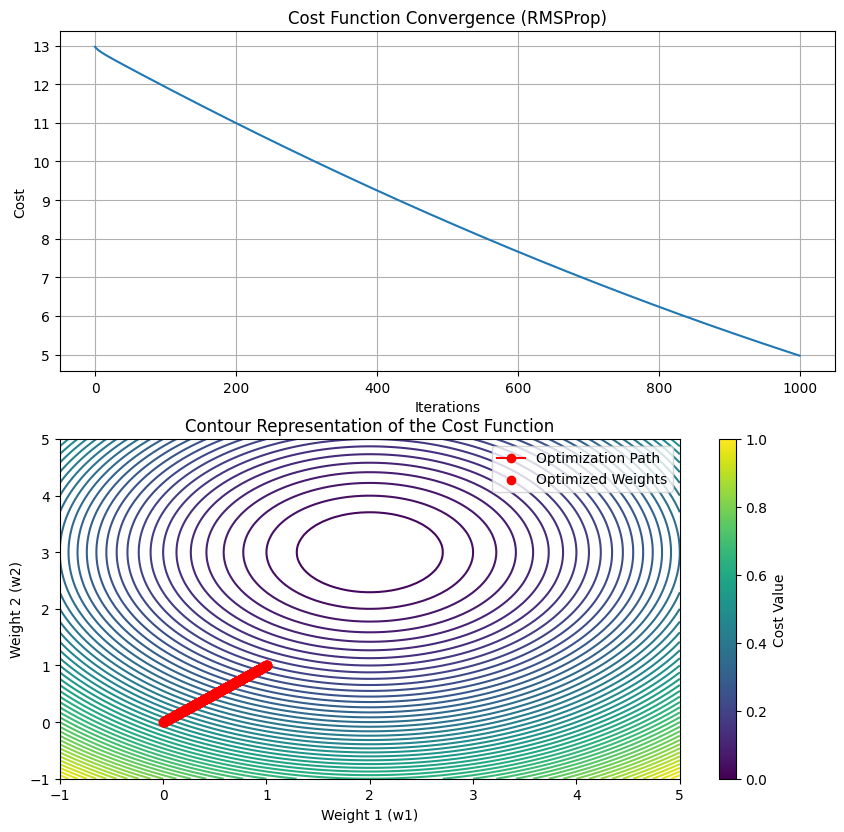

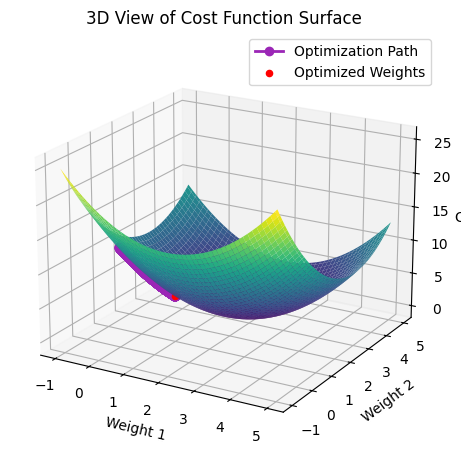

Optimized Weights: [1.00297316 1.00552533]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a smooth cost function (e.g., Mean Squared Error)
def smooth_cost_function(weights):
    """Compute a simple smooth cost function: Squared difference from target"""
    return np.sum((weights - np.array([2, 3]))**2)

# Compute the gradient of the cost function with respect to weights
def gradient_of_cost(weights):
    """Calculate the gradient of the cost function"""
    gradient_w1 = 2 * (weights[0] - 2)
    gradient_w2 = 2 * (weights[1] - 3)
    return np.array([gradient_w1, gradient_w2])

# RMSProp optimization algorithm
def run_rmsprop(cost_fn, grad_fn, initial_weights, learning_rate=0.001, beta=0.9, epsilon=1e-8, max_iters=1000):
    """Apply RMSProp to minimize a cost function"""
    weights = initial_weights.copy()  # Initialize weights
    accumulated_gradients = np.zeros_like(weights)  # Initialize squared gradients
    iteration = 0

    # Store the cost values and path during optimization for plotting
    cost_history = []
    optimization_path = [weights.copy()]

    while iteration < max_iters:
        # Compute the gradient of the cost function
        gradients = grad_fn(weights)

        accumulated_gradients = beta * accumulated_gradients + (1 - beta) * gradients**2

        weights = weights - learning_rate * gradients / (np.sqrt(accumulated_gradients) + epsilon)

        current_cost = cost_fn(weights)
        cost_history.append(current_cost)
        optimization_path.append(weights.copy())

        if np.linalg.norm(gradients) < epsilon:
            break

        iteration += 1

    return weights, cost_history, optimization_path

# Generate a mesh grid for contour and surface plots
def create_plot_grid():
    """Create a grid for the 2D and 3D plots"""
    w1_vals = np.linspace(-1, 5, 100)
    w2_vals = np.linspace(-1, 5, 100)
    w1, w2 = np.meshgrid(w1_vals, w2_vals)
    return w1, w2, np.array([w1, w2])

# Cost function for contour and surface visualization
def cost_function_surface(w1, w2):
    """Generate a surface representing the cost"""
    target_array = np.array([2, 3])[:, np.newaxis, np.newaxis]
    return np.sum((np.array([w1, w2]) - target_array)**2, axis=0)

# Plot 1: Cost vs Iterations (1D)
def plot_cost_over_iterations(cost_history):
    """Visualize the cost reduction over iterations"""
    plt.plot(cost_history)
    plt.title('Cost Function Convergence (RMSProp)')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.grid(True)

# Plot 2: Contour Plot of the Cost Function
def plot_cost_contour_2d(optimized_weights, optimization_path):
    """Contour plot showing the cost function"""
    w1, w2, _ = create_plot_grid()
    cost = cost_function_surface(w1, w2)

    plt.contour(w1, w2, cost, levels=50, cmap='viridis')
    path = np.array(optimization_path)
    plt.plot(path[:, 0], path[:, 1], marker='o', color='r', label='Optimization Path')
    plt.scatter(optimized_weights[0], optimized_weights[1], color='red', label='Optimized Weights', zorder=5)
    plt.title('Contour Representation of the Cost Function')
    plt.xlabel('Weight 1 (w1)')
    plt.ylabel('Weight 2 (w2)')
    plt.colorbar(label='Cost Value')
    plt.legend()

# Plot 3: 3D Surface Plot of the Cost Function
def plot_cost_surface_3d(optimized_weights, optimization_path):
    """Visualize the cost surface in 3D"""
    w1, w2, _ = create_plot_grid()
    cost_surface_3d = cost_function_surface(w1, w2)

    fig = plt.figure()  # Create a new figure for 3D plot
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(w1, w2, cost_surface_3d, cmap='viridis', edgecolor='none')

    # Plot the optimization path in 3D with adjustments:
    path = np.array(optimization_path)
    cost_values = [smooth_cost_function(point) for point in optimization_path]
    ax.plot(path[:, 0], path[:, 1], cost_values, marker='o', color='#9B26B6', label='Optimization Path', linewidth=2)  # Changed color and linewidth

    ax.scatter(optimized_weights[0], optimized_weights[1], smooth_cost_function(optimized_weights), color='red', label='Optimized Weights', zorder=5)

    ax.set_title('3D View of Cost Function Surface')
    ax.set_xlabel('Weight 1')
    ax.set_ylabel('Weight 2')
    ax.set_zlabel('Cost')
    ax.view_init(elev=20, azim=-60)  # Adjusted viewing angle
    ax.legend()

def main():
    # Initial weights for the optimization
    initial_weights = np.array([0.0, 0.0])

    # Run the RMSProp optimization
    optimized_weights, cost_history, optimization_path = run_rmsprop(smooth_cost_function, gradient_of_cost, initial_weights)

    # Create a single figure for all three plots, vertically aligned
    plt.figure(figsize=(10, 15))

    # Plot 1: Cost vs Iterations
    plt.subplot(3, 1, 1)
    plot_cost_over_iterations(cost_history)

    # Plot 2: Contour Plot of the Cost Function
    plt.subplot(3, 1, 2)
    plot_cost_contour_2d(optimized_weights, optimization_path)

    # Plot 3: 3D Surface Plot of the Cost Function
    plot_cost_surface_3d(optimized_weights, optimization_path)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

    print(f"Optimized Weights: {optimized_weights}")

# Run the main function
if __name__ == "__main__":
    main()
